In [1]:
import sys, os, pickle
sys.path.append('/home/om2382/vanilla-rtrl/')
from cluster import *
from continual_learning import *
from core import *
from dynamics import *
from functions import *
from gen_data import *
from learning_algorithms import *
from optimizers import *
from plotting import *
from torch_tools import *
from wrappers import *
import matplotlib.pyplot as plt
import torch
from torch.optim.lr_scheduler import ExponentialLR

In [2]:
T_trial = 100
task = Context_Dependent_Decision_Task(T_trial=T_trial, input_var=0.1, report_cue=True)

In [3]:
root_name = 'RFLO_CDI_b200_50_examples_ctx0'
signal_dicts, result = unpack_cross_compare_result(root_name, checkpoint_stats={'test_loss': get_checkpoint_loss,
                                                                                'n_nodes': get_checkpoint_n_stable_FPs,
                                                                                'discriminant': get_checkpoint_cubic_discriminant,
                                                                                'lengths': get_checkpoint_maximum_cluster_distances},
                                                   results_subdir='PNAS_Paper',
                                                   multi_job_comp=True)

In [ ]:
root_name = 'BPTT_CDI_50_examples_ctx0'
results_dir = '/home/om2382/learning-dynamics/results/misc'
analysis_jobs = [j for j in os.listdir(results_dir) if root_name in j and 'analyze' in j]
checkpoints_dicts_0 = {}
for job_name in analysis_jobs:
    indices, checkpoints = unpack_analysis_results(os.path.join(results_dir, job_name))
    checkpoints_dicts[job_name] = {'indices': indices,
                                   'checkpoints': checkpoints}

(-9.950000000000001, 208.95, -14.49674101793573, 1.216369756253556)

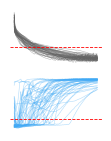

In [4]:
test_loss_threshold = -3.7
#length_threshold = -12.5
length_threshold = -12
node_threshold = 2

loss_events, line_attractor_events, node_events = detect_events(signal_dicts,
                                                                test_loss_threshold=test_loss_threshold,
                                                                length_threshold=length_threshold)

### --- PLOT MANY LOSS CURVES --- ###
cm = 1/2.54
fig, ax = plt.subplots(2, 1, figsize=(3*cm, 4*cm))
for i_key, key in enumerate(signal_dicts):
    l = np.log10(signal_dicts[key]['test_loss'])
    #plt.plot(moving_average_filter(l, window_size=20), color='#646464', linewidth=0.4)
    ax[0].plot(l, color='#646464', linewidth=0.4, alpha=0.44)
    ax[1].plot(signal_dicts[key]['lengths'], linewidth=0.4, color='#3FA9F5', alpha=0.4)
ax[0].axhline(y=-3.5, color='r', linestyle='--', linewidth=0.6)
ax[1].axhline(y=-11, color='r', linestyle='--', linewidth=0.6)
ax[0].axis('off')
ax[1].axis('off')
#fig.savefig('figs/loss_length_all_RFLO_CDI.pdf', format='pdf')

In [3]:
### --- DETECT EVENTS --- ###

test_loss_threshold = -3.5
length_threshold = -12.5
node_threshold = 2

ignore_first = 10
loss_events = []
line_attractor_events = []
node_events = []
for i_key, key in enumerate(signal_dicts):
    append_loss = True
    append_line = True
    append_node = True
    for t in range(ignore_first, 200):
        if np.log10(signal_dicts[key]['test_loss'][t]) < test_loss_threshold and append_loss:
            loss_events.append(t)
            append_loss = False
        if signal_dicts[key]['lengths'][t] > length_threshold and append_line:
            line_attractor_events.append(t)
            append_line = False
        if signal_dicts[key]['n_nodes'][t] >= node_threshold and append_node:
            node_events.append(t)
            append_node = False
    if append_line:
        line_attractor_events.append(200)

NameError: name 'signal_dicts' is not defined

In [ ]:
### --- STACK LOSS CURVES --- ###
cm = 1/2.54
fig = plt.figure(figsize=(4*cm, 4*cm))
for i_key, key in enumerate(signal_dicts):
    l = np.log10(signal_dicts[key]['test_loss'])
    #plt.plot(moving_average_filter(l, window_size=20), color='#646464', linewidth=0.4)
    plt.plot(l, color='#646464', linewidth=0.4)
#plt.axhline(y=test_loss_threshold)
#plt.axhline(y=-2.32, color='r', linestyle='--', linewidth=0.9)
#plt.ylim([-3, -2])
#plt.axis('off')
#fig.savefig('figs/stacked_loss.pdf', format='pdf')

In [ ]:
### --- STACK LENGTHS CURVES --- ###
cm = 1/2.54
fig = plt.figure(figsize=(4, 4))
for i_key, key in enumerate(signal_dicts):
    plt.plot(signal_dicts[key]['lengths'], color='C2', linewidth=0.4)
#plt.xticks(range(0, 200, 10))
plt.axhline(y=length_threshold)
for t in line_attractor_events:
    plt.axvline(x=t, color='k', linestyle='--')
#plt.axhline(y=-2.32, color='r', linestyle='--', linewidth=0.9)
#plt.ylim([-3, -2])
#plt.axis('off')
#fig.savefig('figs/stacked_loss.pdf', format='pdf')

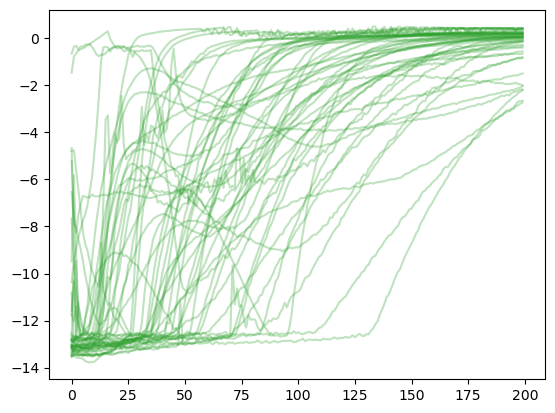

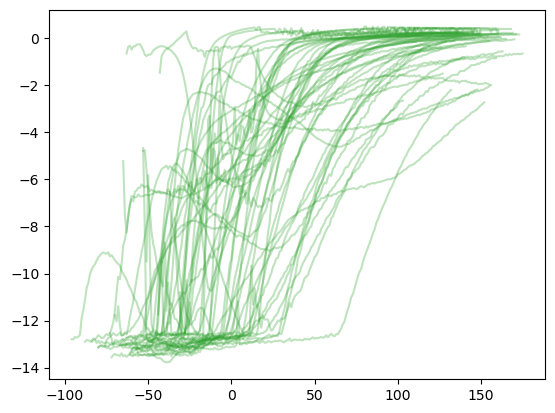

In [7]:
### --- PLOT ALIGNED TRACES --- ###
plt.figure()
for i_key, key in enumerate(signal_dicts):
    t_shift = loss_events[i_key]
    plt.plot(list(range(0, 200)), signal_dicts[key]['lengths'], color='C2', alpha=0.3)
plt.figure()
for i_key, key in enumerate(signal_dicts):
    t_shift = loss_events[i_key]
    plt.plot(list(range(-t_shift, 200 - t_shift)), signal_dicts[key]['lengths'], color='C2', alpha=0.3)

Text(0.5, 1.0, 'r = 0.14')

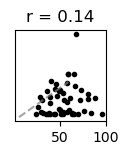

In [8]:
### --- PLOT EVENTS --- ###
cm = 1/2.54
fig = plt.figure(figsize=(3*cm, 3*cm))
x = np.arange(5, 60, 1)
plt.plot(loss_events, line_attractor_events, '.', color='k')
plt.plot(x, x, 'C7', linestyle='--', alpha=0.7)
#plt.xticks([20, 60], [200, 600])
plt.yticks([])
ccoef = np.corrcoef(loss_events, line_attractor_events)[0,1]
plt.title(f'r = {ccoef:.2f}')
#fig.savefig('figs/loss_line.pdf', format='pdf')
#plt.axis('off')

In [ ]:
np.corrcoef(loss_events, line_attractor_events)

In [ ]:
fig, ax = plt.subplots(4, 5)
for i_key, key in enumerate(signal_dicts):
    ax[2*(i_key//5), i_key%5].plot(np.log10(signal_dicts[key]['test_loss']), color='k')
    ax[2*(i_key//5), i_key%5].axis('off')
    ax[2*(i_key//5) + 1, i_key%5].plot(signal_dicts[key]['lengths'], color='C3')
    ax[2*(i_key//5) + 1, i_key%5].axis('off')

In [ ]:
fig, ax = plt.subplots(2, 10, figsize=(16, 4))
for i_key, key in enumerate(signal_dicts):
    ax[0, i_key].plot(np.log10(signal_dicts[key]['test_loss']), color='k')
    ax[0, i_key].axis('off')
    ax[1, i_key].plot(signal_dicts[key]['lengths'], color='C3')
    ax[1, i_key].axis('off')
    ax[0, i_key].set_ylim([-3, -2])

In [ ]:
fig, ax = plt.subplots(4, 10, figsize=(16, 8))
for i_key, key in enumerate(signal_dicts):
    ax[0, i_key].plot(np.log10(signal_dicts[key]['test_loss']), color='k')
    ax[0, i_key].axis('off')
    ax[1, i_key].plot(signal_dicts[key]['lengths'], color='C3')
    ax[1, i_key].axis('off')
for i_key, key in enumerate(signal_dicts_0):
    ax[2, i_key].plot(np.log10(signal_dicts_0[key]['test_loss']), color='k')
    ax[2, i_key].axis('off')
    ax[3, i_key].plot(signal_dicts_0[key]['lengths'], color='C3')
    ax[3, i_key].axis('off')

In [ ]:
fig, ax = plt.subplots(10, 2, figsize=(8, 20))
for i_seed in range(10):
    for i_lr, lr in enumerate(['0,003', '0,01']):
        key = 'analyze_length_testloss_lr_seed={}_lr={}'.format(i_seed, lr)
        ax[i_seed, i_lr].plot(10 *(np.log10(signal_dicts[key]['test_loss']) + 2))
        ax[i_seed, i_lr].plot(signal_dicts[key]['lengths'])

In [ ]:
i_cp = 900
cp_0 = checkpoints_dicts_0['analyze_length_test_loss_seed=0']['checkpoints']['checkpoint_{}'.format(i_cp)]
cp_1 = checkpoints_dicts_1['analyze_length_testloss_ctx1_seed=0']['checkpoints']['checkpoint_{}'.format(i_cp)]

In [ ]:
task = Context_Dependent_Decision_Task(T_trial=100, input_var=0.1, report_cue=True)
data = task.gen_data(0, 1000)
colors = ['#0000FF', '#D62728']
col1 = '#FF0000'
col2 = '#0000FF'
col3 = '#00FF00'
col4 = '#FFFF00'
probe_colors = linearly_interpolate_colors(col1, col2, 10) + linearly_interpolate_colors(col3, col4, 10)
ssa = State_Space_Analysis(cp_0, data, n_PCs=2)
ssa = plot_checkpoint_results(cp_0, data, ssa,
                              plot_fixed_points=True,
                              plot_cluster_means=True,
                              plot_graph_structure=False,
                              plot_test_points=False,
                              n_test_samples=None,
                              T_per_sample=100,
                              test_alpha=1,
                              plot_probe=True,
                              n_probes=20,
                              probe_colors=probe_colors,
                              eig_norm_color=True,
                              graph_key='adjmat_input_1')
W_in_ = cp_0['rnn'].W_in[:,0]
W_out_ = cp_0['rnn'].W_out[0]
w_in = ssa.transform(W_in_)
w_in = w_in / norm(w_in)
w_out = ssa.transform(W_out_)
w_out = w_out / norm(w_out)
#plt.title(key + ', in-out-alignment = {}'.format(normalized_dot_product(W_in_, W_out_)))
#plt.title(key)
if True:
    #ssa.ax.plot([-w_in[0], w_in[0]],
    #            [-w_in[1], w_in[1]], color='k', linewidth=2)
    ssa.ax.plot([-w_out[0], w_out[0]],
                [-w_out[1], w_out[1]], color='g', linewidth=2)
    window_size = 1.2

In [ ]:
task = Context_Dependent_Decision_Task(T_trial=100, input_var=0.1, report_cue=True)
data = task.gen_data(0, 1000)
colors = ['#0000FF', '#D62728']
col1 = '#FF0000'
col2 = '#0000FF'
col3 = '#00FF00'
col4 = '#FFFF00'
probe_colors = linearly_interpolate_colors(col1, col2, 10) + linearly_interpolate_colors(col3, col4, 10)
ssa = State_Space_Analysis(cp_1, data, n_PCs=2)
ssa = plot_checkpoint_results(cp_1, data, ssa,
                              plot_fixed_points=True,
                              plot_cluster_means=True,
                              plot_graph_structure=False,
                              plot_test_points=False,
                              n_test_samples=None,
                              T_per_sample=100,
                              test_alpha=1,
                              plot_probe=True,
                              n_probes=20,
                              probe_colors=probe_colors,
                              eig_norm_color=True,
                              graph_key='adjmat_input_1')
W_in_ = cp_1['rnn'].W_in[:,0]
W_out_ = cp_1['rnn'].W_out[0]
w_in = ssa.transform(W_in_)
w_in = w_in / norm(w_in)
w_out = ssa.transform(W_out_)
w_out = w_out / norm(w_out)
#plt.title(key + ', in-out-alignment = {}'.format(normalized_dot_product(W_in_, W_out_)))
#plt.title(key)
if True:
    #ssa.ax.plot([-w_in[0], w_in[0]],
    #            [-w_in[1], w_in[1]], color='k', linewidth=2)
    ssa.ax.plot([-w_out[0], w_out[0]],
                [-w_out[1], w_out[1]], color='g', linewidth=2)
    window_size = 1.2

In [ ]:
np.std(cp_1['fixed_points'][np.where(cp_1['cluster_labels'] == 0)], axis=0).mean()

In [ ]:
np.std(cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 1)], axis=0).mean()

In [ ]:
M = distance.pdist(cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 1)], 'euclidean')

In [ ]:
M = distance.squareform(M)

In [ ]:
np.where(M == np.max(M))

In [ ]:
r_2 = cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 1)][57]
W_rec = cp_0['rnn'].W_rec.copy()
W_in = cp_0['rnn'].W_in.copy()
b_rec = cp_0['rnn'].b_rec.copy()
c_2 = np.eye(5)[2]
c_1 = np.eye(5)[3]
Delta_c = c_2 - c_1
h_2 = W_rec.dot(r_2) + W_in.dot(c_2) + b_rec
Delta_r = np.linalg.inv(np.eye(32) - np.diag((1 - np.tanh(h_2))**2).dot(W_rec)).dot(np.diag((1 - np.tanh(h_2))**2)).dot(W_in.dot(Delta_c))
r_1 = r_2 - Delta_r

In [ ]:
r_2_ = cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 1)][200]
W_rec = cp_0['rnn'].W_rec.copy()
W_in = cp_0['rnn'].W_in.copy()
b_rec = cp_0['rnn'].b_rec.copy()
c_2 = np.eye(5)[2]
c_1 = np.eye(5)[3]
Delta_c = c_2 - c_1
h_2 = W_rec.dot(r_2_) + W_in.dot(c_2) + b_rec
Delta_r = np.linalg.inv(np.eye(32) - np.diag((1 - np.tanh(h_2))**2).dot(W_rec)).dot(np.diag((1 - np.tanh(h_2))**2)).dot(W_in.dot(Delta_c))
r_1_ = r_2 - Delta_r

In [ ]:
M1 = distance.pdist(cp_0['fixed_points'][np.where(cp_0['cluster_labels'] == 0)], 'euclidean')
M1 = distance.squareform(M1)
np.where(M1 == np.max(M1))

In [ ]:
r_1_real = cp_1['fixed_points'][np.where(cp_1['cluster_labels'] == 0)][82]

In [ ]:
r_1_real_ = cp_1['fixed_points'][np.where(cp_1['cluster_labels'] == 0)][13]

In [ ]:
plt.plot(r_1)
plt.plot(r_1_)
plt.plot(r_1_real)
plt.plot(r_1_real_)


In [ ]:
plt.plot(signal_dicts_0['analyze_length_test_loss_seed=0']['lengths'])

In [ ]:
root_name = 'length_testloss_lr'
results_dir = '/home/om2382/learning-dynamics/results/misc'
analysis_jobs = [j for j in os.listdir(results_dir) if root_name in j and 'analyze' in j]
checkpoints_dicts = {}
for job_name in analysis_jobs:
    indices, checkpoints = unpack_analysis_results(os.path.join(results_dir, job_name))
    checkpoints_dicts[job_name] = {'indices': indices,
                                     'checkpoints': checkpoints}

In [ ]:
fig, ax = plt.subplots(4, 10, figsize=(24, 6))
for i_seed in range(10):
    for i_lr, lr in enumerate(['01', '003']):
        test_loss = []
        lengths = []
        key = 'analyze_length_testloss_lr_seed={}_lr=0,{}'.format(i_seed, lr)
        CPs = checkpoints_dicts[key]['checkpoints']
        for i_cp in range(0, 1000, 100):
            test_loss.append(np.log10(get_checkpoint_loss))
            lengths.append(get_checkpoint_maximum_cluster_distances)
        ax[2*i_lr, i_seed].plot(test_loss, 'k')
        ax[2*i_lr + 1, i_seed].plot(lengths, 'C3')